## 1 단계 : 데이터 전처리 (Data Preprocessing)

In [4]:
# 필요한 라이브러리 불러오기

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np


In [5]:
# 2. 변수값(하이퍼파라미터) 설정하기
batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col =28, 28

In [6]:
# 3. 훈련 및 시험 데이터셋 정의
(x_train, y_train),(x_test, y_test) = mnist.load_data()

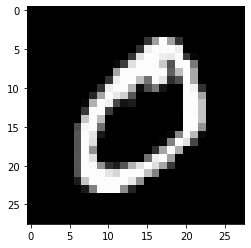

In [7]:
# 4. matplolib 설정하고 훈련 이미지 1개 확인하기
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1], cmap='gray');


In [8]:
y_train.shape[0]

60000

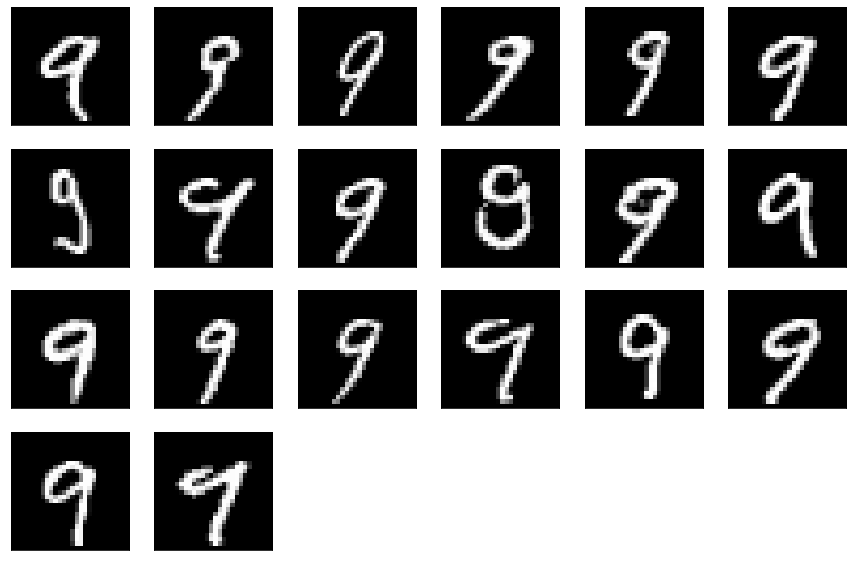

In [9]:
# 5. 특정 클래스에 대한 몇가지 에제 이미지 표시

fig = plt.figure(figsize=(15, 10))

i = 0
for f in range(0, y_train.shape[0]):
  if (y_train[f] == 9 and i < 20) :
    plt.subplot(4, 6, i+1)
    plt.imshow(x_train[f], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    i = i + 1  # i + = 1


In [10]:
# 훈련셋, 테스트셋 형태 확인
print("x_train: {}\nx_test: {}\n".format(x_train.shape, x_test.shape))

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [11]:
# 이미지 채널 설정 ( 채널 x 행 픽셀수 x 열 픽셀수) : 채널이 먼저인지 여부 확인

if K.image_data_format() == 'channels first':
  x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
  x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
  input_shape = (1, im_row, im_col)
else:
  x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
  x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
  input_shape = (im_row, im_col, 1)

In [12]:
# min-max 정규화 후 원-핫 엔코딩
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255  # x_train = x_train / 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, n_classes)  #n_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
y_test.shape

(10000, 10)

In [16]:
# 변환된 데이터 형태 값 확인

print("x_train: {}\nx_test:{}\ninput_shape:{}\n# of training samples : {}\n# of test samples:{}".format(x_train.shape, 
      x_test.shape, input_shape, x_train.shape[0], x_test.shape[0]))

x_train: (60000, 28, 28, 1)
x_test:(10000, 28, 28, 1)
input_shape:(28, 28, 1)
# of training samples : 60000
# of test samples:10000


## 2 단계 모델 설정 및 실행 하기 (Model)

In [17]:
# 모델 설정하기 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) # input_shape:(28, 28, 1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [18]:
# 모델 훈련하기
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="logs/keras_MNIST_CNN.h5",
                             verboses=0, save_best_only=True)
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1, validation_data=(x_test, y_test),
          callbacks=[checkpoint])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/15
469/469 [==============================] - 146s 310ms/step - loss: 0.2343 - accuracy: 0.9286 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 2/15
469/469 [==============================] - 144s 308ms/step - loss: 0.0816 - accuracy: 0.9759 - val_loss: 0.0382 - val_accuracy: 0.9871
Epoch 3/15
469/469 [==============================] - 144s 307ms/step - loss: 0.0618 - accuracy: 0.9816 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch 4/15
469/469 [==============================] - 144s 308ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 5/15
469/469 [==============================] - 144s 308ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0266 - val_accuracy: 0.9907
Epoch 6/15
469/469 [==============================] - 146s 311ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 7/15
469/469 [==============================] - 145s 309ms/step - loss: 0.0327 - accuracy: 0.9891 - val_loss: 0.0285 -

In [19]:
# 시험 세트를 기준으로 모뎅에 대한 AUC 점수를 생성 
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC:{:.2%}".format(auc))

AUC:99.56%


In [20]:
preds = model.predict(x_test)
print("predictions for x_test[0]: {}\n\nActual label for x_test[0]:{}\n".format(preds[0], y_test[0]))
print("predictions for x_test[0] after rounding : {}\n".format(np.round(preds)[0]))

predictions for x_test[0]: [1.8329776e-15 5.8250219e-12 3.3458181e-13 3.4235028e-13 3.9385605e-15
 6.2037401e-17 2.0764363e-20 1.0000000e+00 2.3711964e-17 2.7869233e-12]

Actual label for x_test[0]:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

predictions for x_test[0] after rounding : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



In [ ]:
from keras import models

layers = [layer.output for layer in model.layers[:4]]
model_layers = models.Model(inputs=model.input, outputs=layers)
activations = model_layers.predict(x_train) 

fig  = plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
  plt.subplot(1, 3, f+1)
  plt.title("Convolution layer %d" %f)
  layer_activation = activation[f]
  plt.imshow(layer_activation[7, :, :, 0], cmap='gray')
  plt.xticks([])
  plt.yticks([])

plt.show()
